### Celebrity image classification using CNN

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

In [2]:
image_dir = r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped'

celebrities = {
    'lionel_messi': 0,
    'maria_sharapova': 1,
    'roger_federer': 2,
    'serena_williams': 3,
    'virat_kohli': 4 }

dataset = []
label = []
img_size = (128, 128)

for celebrity, index in tqdm(celebrities.items()):
    celeb_images = os.listdir(os.path.join(image_dir, celebrity))
    for i, image_name in tqdm(enumerate(celeb_images), desc=celebrity):
        if image_name.split('.')[1] == 'png':
            image = cv2.imread(os.path.join(image_dir, celebrity, image_name))
            image = Image.fromarray(image, 'RGB')
            image = image.resize(img_size)
            dataset.append(np.array(image))
            label.append(index)

dataset = np.array(dataset)
label = np.array(label)

print("--------------------------------------\n")
print('Dataset Length: ', len(dataset))
print('Label Length: ', len(label))

lionel_messi: 36it [00:00, 140.14it/s]
maria_sharapova: 34it [00:00, 223.18it/s]t/s]
roger_federer: 28it [00:00, 303.54it/s]6it/s]
serena_williams: 29it [00:00, 251.44it/s]t/s]
virat_kohli: 41it [00:00, 432.08it/s].75it/s]
100%|██████████| 5/5 [00:00<00:00,  6.51it/s]

--------------------------------------

Dataset Length:  168
Label Length:  168


In [3]:
print("Train-Test Split")
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=42)
print("--------------------------------------\n")

print("Normalaising the Dataset. \n")

x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

print("--------------------------------------\n")


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
print("--------------------------------------\n")
model.summary()
print("--------------------------------------\n")

Train-Test Split
--------------------------------------

Normalaising the Dataset. 

--------------------------------------

--------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                       

In [4]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
print("--------------------------------------\n")


print("Training Started.\n")
history=model.fit(x_train,y_train,epochs=50,batch_size =32,validation_split=0.3)
print("Training Finished.\n")
print("--------------------------------------\n")

--------------------------------------

Training Started.

Epoch 1/50
3/3 [==============================] - 3s 812ms/step - loss: 9.7753 - accuracy: 0.1828 - val_loss: 19.2124 - val_accuracy: 0.1463
Epoch 2/50
3/3 [==============================] - 2s 662ms/step - loss: 12.2699 - accuracy: 0.2581 - val_loss: 2.6036 - val_accuracy: 0.2683
Epoch 3/50
3/3 [==============================] - 2s 673ms/step - loss: 7.1848 - accuracy: 0.2688 - val_loss: 3.1610 - val_accuracy: 0.2195
Epoch 4/50
3/3 [==============================] - 2s 637ms/step - loss: 3.9799 - accuracy: 0.2581 - val_loss: 2.8231 - val_accuracy: 0.1463
Epoch 5/50
3/3 [==============================] - 2s 693ms/step - loss: 2.5865 - accuracy: 0.3548 - val_loss: 2.0189 - val_accuracy: 0.1463
Epoch 6/50
3/3 [==============================] - 2s 680ms/step - loss: 1.5272 - accuracy: 0.3763 - val_loss: 1.5402 - val_accuracy: 0.3171
Epoch 7/50
3/3 [==============================] - 2s 672ms/step - loss: 1.4928 - accuracy: 0.3978 -

In [5]:
print("Model Evalutaion Phase.\n")
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Accuracy: {round(accuracy*100,2)}')
print("--------------------------------------\n")


y_pred=model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
print('classification Report\n',classification_report(y_test,y_pred))
print("--------------------------------------\n")

Model Evalutaion Phase.

2/2 [==============================] - 0s 21ms/step - loss: 0.9055 - accuracy: 0.7353
Accuracy: 73.53
--------------------------------------

2/2 [==============================] - 0s 10ms/step
classification Report
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.75      0.86      0.80         7
           2       0.50      0.75      0.60         4
           3       0.75      0.50      0.60         6
           4       0.67      0.86      0.75         7

    accuracy                           0.74        34
   macro avg       0.73      0.73      0.71        34
weighted avg       0.78      0.74      0.74        34

--------------------------------------



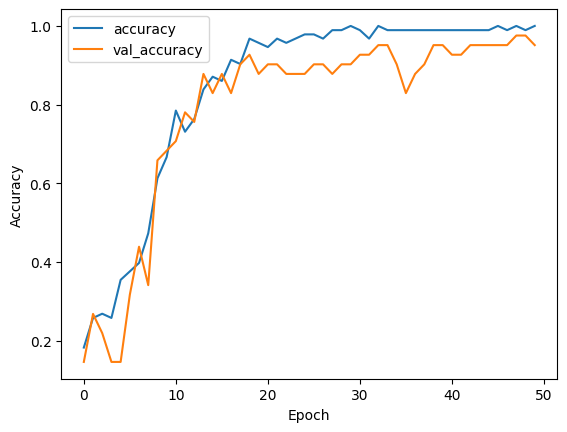

In [6]:
# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
print("Model Prediction.\n")


def preprocess_single_image(image_path):
    img_size = (128, 128)
    image = cv2.imread(image_path)
    image = Image.fromarray(image, 'RGB')
    image = image.resize(img_size)
    image = np.array(image)
    image = image.astype('float32') / 255.0
    return image

def predict_celebrity(image_path, model):
    single_image = preprocess_single_image(image_path)
    single_image = np.expand_dims(single_image, axis=0)
    predictions = model.predict(single_image)
    predicted_class = np.argmax(predictions)
    
    class_names = ['lionel Messi', 'Maria Sharapova', 'Roger Federer', 'Serena Williams', 'Virat Kohli']
    predicted_label = class_names[predicted_class]

    return predicted_label


Model Prediction.



In [10]:
# List of paths to images you want to predict
image_paths_to_predict = [
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\lionel_messi\lionel_messi1.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\maria_sharapova\maria_sharapova1.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\roger_federer\roger_federer1.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\serena_williams\serena_williams16.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\virat_kohli\virat_kohli1.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\lionel_messi\lionel_messi8.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\maria_sharapova\maria_sharapova8.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\roger_federer\roger_federer3.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\serena_williams\serena_williams7.png',
    r'D:\STUDY\Sem3\deeplearning\CELEBRITY\Dataset_Celebrities\cropped\virat_kohli\virat_kohli5.png'
]
# Preprocess and predict for each image
for image_path in image_paths_to_predict:
    print(predict_celebrity(image_path,model))

1/1 [==============================] - 0s 71ms/step
lionel Messi
1/1 [==============================] - 0s 50ms/step
Maria Sharapova
1/1 [==============================] - 0s 55ms/step
Roger Federer
1/1 [==============================] - 0s 66ms/step
Serena Williams
1/1 [==============================] - 0s 60ms/step
Virat Kohli
1/1 [==============================] - 0s 55ms/step
lionel Messi
1/1 [==============================] - 0s 58ms/step
Maria Sharapova
1/1 [==============================] - 0s 51ms/step
Roger Federer
1/1 [==============================] - 0s 52ms/step
Serena Williams
1/1 [==============================] - 0s 60ms/step
Virat Kohli


Data Preparation: Loaded images from directories, resized them, and stored them in dataset and label lists.
Split the data into training and testing sets.

Model Architecture: Created a sequential model with Convolutional layers (Conv2D) with ReLU activation and max-pooling (MaxPooling2D). Flattening layer to convert data to a 1D array. Dense layers with ReLU activation, a dropout layer to prevent overfitting, and a final softmax layer for classification.

Training: Compiled the model with Adam optimizer and sparse categorical cross-entropy loss. Trained the model on the training data for 50 epochs.

Evaluation: Evaluated the trained model on the test data and obtained accuracy metrics. Generated a classification report with precision, recall, and F1-score for each class.

Prediction: Defined functions to preprocess single images and predict their classes using the trained model. Predicted classes for a set of test images.

Model Performance: The model achieved an accuracy of approximately 73.53% on the test set. The model predictions for the provided images are consistent with the expected classes. Each image has been correctly classified as the respective celebrity: Lionel Messi, Maria Sharapova, Roger Federer, Serena Williams, and Virat Kohli. This suggests that the model is making accurate predictions for these specific images. 